In [77]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats

In [78]:
data_final_merged = 'Data/final_merged_data.csv.gz'
data_basics = 'Data/title_basics.csv.gz'
data_rating = 'Data/title.ratings.tsv.gz'

In [79]:
df = pd.read_csv(data_final_merged)
db = pd.read_csv(data_basics)
df_rating = pd.read_csv(data_rating)

The stakeholder's first question is: does the MPAA rating of a movie (G/PG/PG-13/R) affect how much revenue the movie generates?

They want you to perform a statistical test to get a mathematically-supported answer.
They want you to report if you found a significant difference between ratings.
If so, what was the p-value of you analysis?
And which rating earns the most revenue?
They want you to prepare a visualization that supports your finding.

In [80]:
df.head()

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,tt0118694,0.0,/n4GJFGzsc7NinI1VeGDXIcQjtU2.jpg,NaN,150000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",http://www.wkw-inthemoodforlove.com/,843.0,cn,花樣年華,...,12854953.0,99.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,"Feel the heat, keep the feeling burning, let t...",In the Mood for Love,0.0,8.108,1982.0,PG
1,tt0119273,0.0,/f5C03doOWiauu37bToKXtpgP5bS.jpg,"{'id': 141086, 'name': 'Heavy Metal Collection...",15000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",NaN,16225.0,en,Heavy Metal 2000,...,0.0,88.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,not to survive the fight in the external world...,Heavy Metal 2000,0.0,6.110,159.0,R
2,tt0120467,0.0,/knok3mNReKqPTplnnqz7E4dd7mD.jpg,NaN,120000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 27, 'name...",NaN,19085.0,en,Vulgar,...,14904.0,87.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Everyone loves a clown... some more than others.,Vulgar,0.0,5.400,42.0,R
3,tt0120630,0.0,/sPAwM8WxMdXNlqeP4F9DMe9LYoY.jpg,"{'id': 718551, 'name': 'Chicken Run Collection...",45000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",NaN,7443.0,en,Chicken Run,...,224834564.0,84.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,This ain't no chick flick. It's poultry in mot...,Chicken Run,0.0,6.726,4123.0,G
4,tt0120753,0.0,NaN,NaN,8000000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 53, 'name...",NaN,318.0,en,The Million Dollar Hotel,...,105983.0,122.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Everyone has something to hide.,The Million Dollar Hotel,0.0,5.915,254.0,R


In [100]:
db.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0035423,movie,Kate & Leopold,Kate & Leopold,0,2001,NaN,118,"Comedy,Fantasy,Romance"
1,tt0062336,movie,The Tango of the Widower and Its Distorting Mi...,El Tango del Viudo y Su Espejo Deformante,0,2020,NaN,70,Drama
2,tt0069049,movie,The Other Side of the Wind,The Other Side of the Wind,0,2018,NaN,122,Drama
3,tt0088751,movie,The Naked Monster,The Naked Monster,0,2005,NaN,100,"Comedy,Horror,Sci-Fi"
4,tt0096056,movie,Crime and Punishment,Crime and Punishment,0,2002,NaN,126,Drama


In [101]:
df_rating.head()

,tconst,averageRating,numVotes
0,tt0000001,5.7,1910
1,tt0000002,5.8,257
2,tt0000005,6.2,2530
3,tt0000006,5.1,173
4,tt0000007,5.4,789


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 384 entries, 0 to 383
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_id                384 non-null    object 
 1   adult                  384 non-null    float64
 2   backdrop_path          363 non-null    object 
 3   belongs_to_collection  81 non-null     object 
 4   budget                 384 non-null    float64
 5   genres                 384 non-null    object 
 6   homepage               60 non-null     object 
 7   id                     384 non-null    float64
 8   original_language      384 non-null    object 
 9   original_title         384 non-null    object 
 10  overview               383 non-null    object 
 11  popularity             384 non-null    float64
 12  poster_path            381 non-null    object 
 13  production_companies   384 non-null    object 
 14  production_countries   384 non-null    object 
 15  releas

In [82]:
df.isna().sum()

imdb_id                    0
adult                      0
backdrop_path             21
belongs_to_collection    303
budget                     0
genres                     0
homepage                 324
id                         0
original_language          0
original_title             0
overview                   1
popularity                 0
poster_path                3
production_companies       0
production_countries       0
release_date               0
revenue                    0
runtime                    0
spoken_languages           0
status                     0
tagline                   39
title                      0
video                      0
vote_average               0
vote_count                 0
certification              0
dtype: int64

<AxesSubplot:xlabel='certification', ylabel='revenue'>

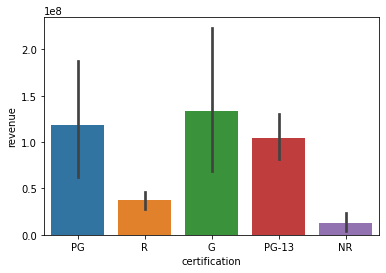

In [83]:
sns.barplot(data=df,x='certification',y='revenue')

# First Hypothesis test 

# Null Hypothesis: Different certification have the same revenue.

# Alternative Hypothesis: Different certification have different revenue.

In [84]:

## Create groups dictionary. There are only 3 groups, but this is even more helpful when there are many groups
groups = {}
## Loop through all unique categories
for i in df['certification'].unique():
    ## Get series for group and rename
    data = df.loc[df['certification']==i,'revenue'].copy()
    
    # save into the dictionary
    groups[i] = data
groups.keys()

dict_keys(['PG', 'R', 'G', 'PG-13', 'NR'])

In [85]:
## Running normal test on each group and confirming there are >20 in each group
norm_results = {}
for i, data in groups.items():
    stat, p = stats.normaltest(data)
    ## save the p val, test statistic, and the size of the group
    norm_results[i] = {'n': len(data),
                             'p':p,
                             'test stat':stat,}
## convert to a dataframe
norm_results_df = pd.DataFrame(norm_results).T
norm_results_df

/Users/pinl/opt/miniconda3/envs/dojo-env/lib/python3.8/site-packages/scipy/stats/_stats_py.py:1477: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/Users/pinl/opt/miniconda3/envs/dojo-env/lib/python3.8/site-packages/scipy/stats/_stats_py.py:1477: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


,n,p,test stat
PG,33.0,1.522017e-10,45.211628
R,203.0,1.340384e-34,155.989874
G,13.0,2.738366e-05,21.011128
PG-13,124.0,7.853050e-19,83.376430
NR,11.0,3.062779e-01,2.366525


check normality

our N is not large enough, we move to the non-parametric equivalent test

In [86]:
# perform the correct hypothesis test
# note again the use of the * operator for convenience
result = stats.kruskal(*groups.values())
print(result)
print(result.pvalue <.05)

KruskalResult(statistic=68.76925098518367, pvalue=4.1282072259603264e-14)
True


pvalue is greater than .05, which means we fail to reject our null hypothesis.It means different certification have the same revenue.



# second hypothesis test

# null hypothesis:Movies over 2.5 hours and movies less 2.5 hours have the same revenue

# alternative hypothesis: the revenue of movies over 2.5 hours is higher than the revenue of movies less than 2.5 hours

In [87]:
df['hour_over_25'] = df['runtime'].apply(lambda x:True if(x>150) else False)

In [88]:
df.head()

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification,hour_over_25
0,tt0118694,0.0,/n4GJFGzsc7NinI1VeGDXIcQjtU2.jpg,NaN,150000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",http://www.wkw-inthemoodforlove.com/,843.0,cn,花樣年華,...,99.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,"Feel the heat, keep the feeling burning, let t...",In the Mood for Love,0.0,8.108,1982.0,PG,False
1,tt0119273,0.0,/f5C03doOWiauu37bToKXtpgP5bS.jpg,"{'id': 141086, 'name': 'Heavy Metal Collection...",15000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",NaN,16225.0,en,Heavy Metal 2000,...,88.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,not to survive the fight in the external world...,Heavy Metal 2000,0.0,6.110,159.0,R,False
2,tt0120467,0.0,/knok3mNReKqPTplnnqz7E4dd7mD.jpg,NaN,120000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 27, 'name...",NaN,19085.0,en,Vulgar,...,87.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Everyone loves a clown... some more than others.,Vulgar,0.0,5.400,42.0,R,False
3,tt0120630,0.0,/sPAwM8WxMdXNlqeP4F9DMe9LYoY.jpg,"{'id': 718551, 'name': 'Chicken Run Collection...",45000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",NaN,7443.0,en,Chicken Run,...,84.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,This ain't no chick flick. It's poultry in mot...,Chicken Run,0.0,6.726,4123.0,G,False
4,tt0120753,0.0,NaN,NaN,8000000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 53, 'name...",NaN,318.0,en,The Million Dollar Hotel,...,122.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Everyone has something to hide.,The Million Dollar Hotel,0.0,5.915,254.0,R,False


In [89]:
df = df.loc[df['revenue']>0]

In [90]:
## separate the column of interest based on the groups
over_df = df.loc[df['hour_over_25']==True,['runtime','revenue','hour_over_25']]
not_df = df.loc[df['hour_over_25']==False,['runtime','revenue','hour_over_25']]
print(f"The total movies of over 2.5 hours is {len(over_df)}")
print(f"The total movies of less 2.5 hours is {len(not_df)} ")

The total movies of over 2.5 hours is 11
The total movies of less 2.5 hours is 294 


In [91]:
## concatenate the two dataframes for visulziation.
plot_df = pd.concat([over_df,not_df],axis=0)
plot_df

,runtime,revenue,hour_over_25
57,155.0,465361176.0,True
89,165.0,215294342.0,True
163,199.0,4900000.0,True
177,154.0,20908467.0,True
190,179.0,871368364.0,True
...,...,...,...
371,105.0,1023156.0,False
373,113.0,44909486.0,False
375,113.0,42776760.0,False
376,119.0,318451.0,False


<AxesSubplot:xlabel='hour_over_25', ylabel='revenue'>

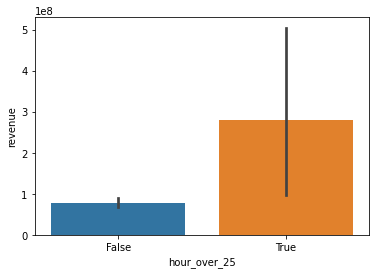

In [92]:
## viusalizing means 
sns.barplot(data=plot_df,x='hour_over_25',y='revenue')

In [93]:
## now that we have visualized the groups, we can save a final male_group and female_group 
# that are. a pandas seris this will make the rest of our workflow simpler than if 
# we still had a dataframe

over_group = over_df['revenue']
not_group = not_df['revenue']
display(over_group.head(),not_group.head())

57     465361176.0
89     215294342.0
163      4900000.0
177     20908467.0
190    871368364.0
Name: revenue, dtype: float64

0     12854953.0
2        14904.0
3    224834564.0
4       105983.0
5    546388105.0
Name: revenue, dtype: float64

Checking outliers

In [94]:
# checking assumptions of 2-sample t-test
## checking each group seperately
## checking for abs value of z-scores that are > 3
is_outlier_over = np.abs(stats.zscore(over_group)) > 3
print(f"There are {is_outlier_over.sum()} outliers in the discounted group out of {len(over_group)}")

There are 0 outliers in the discounted group out of 11


In [95]:
# checking assumptions of 2-sample t-test
## checking each group seperately
## checking for abs value of z-scores that are > 3
is_outlier_not = np.abs(stats.zscore(not_group)) > 3
print(f"There are {is_outlier_not.sum()} outliers in the non-discouted group out of {len(not_group)}") 

There are 6 outliers in the non-discouted group out of 294


In [96]:
not_group.loc[~is_outlier_not]
not_group

0       12854953.0
2          14904.0
3      224834564.0
4         105983.0
5      546388105.0
          ...     
371      1023156.0
373     44909486.0
375     42776760.0
376       318451.0
379      4035192.0
Name: revenue, Length: 294, dtype: float64

In [97]:
not_group = not_group.loc[~is_outlier_not]
not_group

0       12854953.0
2          14904.0
3      224834564.0
4         105983.0
6      296339527.0
          ...     
371      1023156.0
373     44909486.0
375     42776760.0
376       318451.0
379      4035192.0
Name: revenue, Length: 288, dtype: float64

In [98]:
# normal test males
result_m = stats.shapiro(not_group)
print(result_m)
print(result_m.pvalue<.05)


ShapiroResult(statistic=0.7760443687438965, pvalue=1.4768544695067698e-19)
True


Since our p-value was less than .05,the null hypothesis for the test groups abnormal distribution.we will over variance test and give non-parametic test.



In [99]:
result = stats.mannwhitneyu(over_group,not_group)
print(result)
result.pvalue<.05

MannwhitneyuResult(statistic=1888.0, pvalue=0.2808373148776786)


False

Based on our test result, our pvalue is greater than .05, which means we fail to reject the null hypothesis. In this case, this means that there are no differeces of revenue between over 2.5 hours movies and less 2.5 hours movies.

# third hypothesis test

Do movies released in 2012 earn less revenue than movies released in 2013?

null hypothesis: there is no difference of revenue between movies in 2007 and moives in 2008

alternative hypothesis: there is a significance difference between movies in 2007 and moives in 2008

In [124]:
df_07 = pd.read_csv('Data/final_tmdb_data_2007.csv.gz')
df_08 = pd.read_csv('Data/final_tmdb_data_2008.csv.gz')

In [131]:
dfyear = pd.concat([df_07,df_08])

In [132]:
dfyear.head()

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0119231,0.0,NaN,NaN,0.0,"[{'id': 35, 'name': 'Comedy'}]",NaN,107182.0,en,The Junior Defenders,...,0.0,82.0,[],Released,NaN,The Junior Defenders,0.0,3.00,1.0,NaN
2,tt0211933,0.0,/nAVntSurtINQNtYPU7ijgCtgz7W.jpg,NaN,86000000.0,"[{'id': 53, 'name': 'Thriller'}, {'id': 80, 'n...",NaN,13483.0,en,Awake,...,14373825.0,84.0,"[{'english_name': 'Japanese', 'iso_639_1': 'ja...",Released,"Every year, one in 700 people wake up during s...",Awake,0.0,6.43,1126.0,R
3,tt0213985,0.0,/d9WT4FCjvB3Z6Sx2cYckdPi9rMI.jpg,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,14608.0,en,Partition,...,0.0,116.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,NaN,Partition,0.0,6.20,22.0,R
4,tt0218140,0.0,NaN,NaN,0.0,[],NaN,316153.0,en,Death and Taxis,...,0.0,0.0,[],Released,NaN,Death and Taxis,0.0,0.00,0.0,NaN


In [134]:
dfyear.isna().sum()

imdb_id                     0
adult                       0
backdrop_path            1867
belongs_to_collection    3676
budget                      0
genres                      0
homepage                 3058
id                          0
original_language           0
original_title              0
overview                   90
popularity                  0
poster_path               553
production_companies        0
production_countries        0
release_date               58
revenue                     0
runtime                     0
spoken_languages            0
status                      0
tagline                  2319
title                       0
video                       0
vote_average                0
vote_count                  0
certification            2678
dtype: int64

In [135]:
dfyear.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3945 entries, 1 to 2090
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_id                3945 non-null   object 
 1   adult                  3945 non-null   float64
 2   backdrop_path          2078 non-null   object 
 3   belongs_to_collection  269 non-null    object 
 4   budget                 3945 non-null   float64
 5   genres                 3945 non-null   object 
 6   homepage               887 non-null    object 
 7   id                     3945 non-null   float64
 8   original_language      3945 non-null   object 
 9   original_title         3945 non-null   object 
 10  overview               3855 non-null   object 
 11  popularity             3945 non-null   float64
 12  poster_path            3392 non-null   object 
 13  production_companies   3945 non-null   object 
 14  production_countries   3945 non-null   object 
 15  rele

In [133]:
dfyear.dropna(subset=['revenue'],inplace=True)

In [136]:
dfyear.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3945 entries, 1 to 2090
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_id                3945 non-null   object 
 1   adult                  3945 non-null   float64
 2   backdrop_path          2078 non-null   object 
 3   belongs_to_collection  269 non-null    object 
 4   budget                 3945 non-null   float64
 5   genres                 3945 non-null   object 
 6   homepage               887 non-null    object 
 7   id                     3945 non-null   float64
 8   original_language      3945 non-null   object 
 9   original_title         3945 non-null   object 
 10  overview               3855 non-null   object 
 11  popularity             3945 non-null   float64
 12  poster_path            3392 non-null   object 
 13  production_companies   3945 non-null   object 
 14  production_countries   3945 non-null   object 
 15  rele

In [140]:
dfyear = dfyear.loc[dfyear['revenue']>0]

In [141]:
dfyear.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 688 entries, 2 to 2086
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_id                688 non-null    object 
 1   adult                  688 non-null    float64
 2   backdrop_path          650 non-null    object 
 3   belongs_to_collection  117 non-null    object 
 4   budget                 688 non-null    float64
 5   genres                 688 non-null    object 
 6   homepage               325 non-null    object 
 7   id                     688 non-null    float64
 8   original_language      688 non-null    object 
 9   original_title         688 non-null    object 
 10  overview               686 non-null    object 
 11  popularity             688 non-null    float64
 12  poster_path            685 non-null    object 
 13  production_companies   688 non-null    object 
 14  production_countries   688 non-null    object 
 15  relea

<AxesSubplot:ylabel='revenue'>

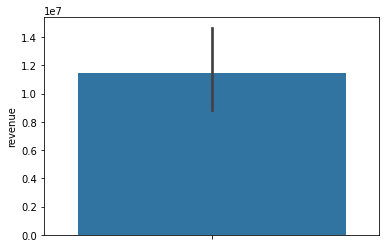

In [144]:
## viusalizing means 
sns.barplot(data=df_07,y='revenue')

<AxesSubplot:ylabel='revenue'>

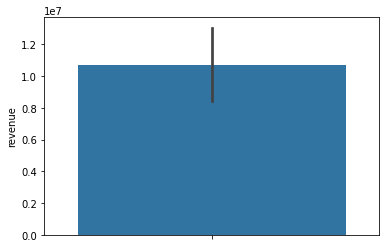

In [145]:
## viusalizing means 
sns.barplot(data=df_08,y='revenue')

In [149]:
## separate the column of interest based on the groups
group_07 = df_07.loc[df_07['revenue']>0,'revenue']
group_08 = df_08.loc[df_08['revenue']>0,'revenue']
print(f"The total of discounted products sell quantities is {len(group_07)}")
print(f"The total of non-discounted products sell quantities is {len(group_08)} ")

The total of discounted products sell quantities is 353
The total of non-discounted products sell quantities is 335 


In [150]:
# checking assumptions of 2-sample t-test
## checking each group seperately
## checking for abs value of z-scores that are > 3
is_outlier_07 = np.abs(stats.zscore(group_07)) > 3
print(f"There are {is_outlier_07.sum()} outliers in the discounted group out of {len(group_07)}")

There are 9 outliers in the discounted group out of 353


In [151]:
group_07.loc[~is_outlier_07]
group_07

2        14373825.0
7       228738393.0
9          458232.0
10       25005257.0
11      258022233.0
           ...     
1751      2396341.0
1756     14249906.0
1766      3898774.0
1794       618400.0
1797      7600000.0
Name: revenue, Length: 353, dtype: float64

In [152]:
## remove outliers
group_07 = group_07.loc[~is_outlier_07]
group_07

2        14373825.0
7       228738393.0
9          458232.0
10       25005257.0
11      258022233.0
           ...     
1751      2396341.0
1756     14249906.0
1766      3898774.0
1794       618400.0
1797      7600000.0
Name: revenue, Length: 344, dtype: float64

In [153]:
# checking assumptions of 2-sample t-test
## checking each group seperately
## checking for abs value of z-scores that are > 3
is_outlier_08 = np.abs(stats.zscore(group_08)) > 3
print(f"There are {is_outlier_08.sum()} outliers in the non-discouted group out of {len(group_08)}")

There are 9 outliers in the non-discouted group out of 335


In [154]:
group_08.loc[~is_outlier_08]
group_08

3        64828421.0
8          694782.0
11       72109200.0
12        2783332.0
13      786636033.0
           ...     
1773      1000000.0
1826      6032296.0
1847       414000.0
2042         4000.0
2086       718500.0
Name: revenue, Length: 335, dtype: float64


Checking for normality

According to the workflow on the LP, since both groups have n>15, we can safely ignore the assumption of normality

In [156]:
result = stats.levene(group_07,group_08)
print(result)
print(result.pvalue<.05)

LeveneResult(statistic=9.082929224445865, pvalue=0.002676433044010712)
True


Since our p-value was less than .05,the null hypothesis for the test groups have unequal variances. 

In [157]:
result = stats.ttest_ind(group_07,group_08,equal_var=False)
print(result)
result.pvalue<.05

Ttest_indResult(statistic=-2.950766004873367, pvalue=0.003314408462897258)


True


Based on our test result, our pvalue is less than .05, which means we reject the null hypothesis. In this case, it means alternative hypothesis: there is a significance difference of revenue between movies in 2007 and moives in 2008

In [158]:
print(f"The average revenue of moives in 2007 groups was {group_07.mean():.2f}")
print(f"The average revenue of moives in 2008 groups was {group_08.mean():.2f}")

The average revenue of moives in 2007 groups was 42889434.37
The average revenue of moives in 2008 groups was 66629736.59
